<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/wyklad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agenda**
1. Wczytanie danych z pliku
2. Podział danych na X i y
3. Przekształcenie zmiennych kategorialnych
4. Podział X, y na zbiór treningowy i testowy
5. Przygotowanie danych treningowych do modelu jeśli potrzeba
6. Stworzenie modelu
7. Predyckja modelu
8. Ocena modelu
9. Zapisanie modelu do pliku
10. Odczyt modelu z pliku
11. Wprowadzenie parametru dla nierównolicznych klas
12. Interpretowalność modelu

Zbiór danych wykorzystany podczas tych laboratoriów to Insurance Travel

https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

Klasyfikacja czy klient kupi ubezpieczenie podróżne

**Wczytanie danych z pliku**

In [ ]:
import os
from pathlib import Path
import pandas as pd
current_path = Path(os.path.dirname(os.path.abspath("__file__")))

file_name="TravelInsurancePrediction.csv"
data=pd.read_csv(os.path.join(current_path,file_name))

data.head(3)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [ ]:
#sprawdzenie wartosci pustych

data.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**Podział danych na X oraz y**

In [ ]:
y=data["TravelInsurance"]
X=data.drop(columns=["TravelInsurance"])

y=y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

In [ ]:
X.head(3)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,31,Government Sector,Yes,400000,6,1,No,No
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No


In [ ]:
#usuniecie kolumny z id klienta
X=X.drop(columns=["Unnamed: 0"])
X.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No


**Przekształcenie zmiennych kategorialnych**

In [ ]:
#zamiana zmiennych kategorialnych za pomoca one hot
X=pd.get_dummies(data=X, drop_first=True)
X.head(3)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0
1,31,1250000,7,0,1,1,0,0
2,34,500000,4,1,1,1,0,0


Zapisanie zmiennych X oraz y (przyda sie w kolejnym notebooku)

In [ ]:
X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)

**Podział danych na zbiór treningowy i testowy**

In [ ]:
#sprawdzenie licznosci kazdej z klasy
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
#dodanie parametru stratify=y powoduje, że udział procentowy każdej klasy będzie taki sam w zbiorze testowym i w zbiorze treningowym
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Rozmiar X_train", X_train.shape)
print("Rozmiar X_test", X_test.shape)
print("Rozmiar y_train", y_train.shape)
print("Rozmiar y_test", y_test.shape)

Rozmiar X_train (1589, 8)
Rozmiar X_test (398, 8)
Rozmiar y_train (1589,)
Rozmiar y_test (398,)


**Klasyfikator Decision Tree**

[Text(0.5, 0.875, 'AnnualIncome <= 1325000.0\ngini = 0.459\nsamples = 1589\nvalue = [1021, 568]\nclass = No'),
 Text(0.25, 0.625, 'Age <= 32.5\ngini = 0.358\nsamples = 1302\nvalue = [998, 304]\nclass = No'),
 Text(0.125, 0.375, 'AnnualIncome <= 425000.0\ngini = 0.298\nsamples = 1003\nvalue = [820, 183]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.133\nsamples = 140\nvalue = [130, 10]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.321\nsamples = 863\nvalue = [690, 173]\nclass = No'),
 Text(0.375, 0.375, 'FamilyMembers <= 5.5\ngini = 0.482\nsamples = 299\nvalue = [178, 121]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.321\nsamples = 209\nvalue = [167, 42]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.215\nsamples = 90\nvalue = [11, 79]\nclass = Yes'),
 Text(0.75, 0.625, 'AnnualIncome <= 1725000.0\ngini = 0.147\nsamples = 287\nvalue = [23, 264]\nclass = Yes'),
 Text(0.625, 0.375, 'ChronicDiseases <= 0.5\ngini = 0.116\nsamples = 274\nvalue = [17, 257]\nclass = Yes'),
 Text(0.5625, 0.125, 

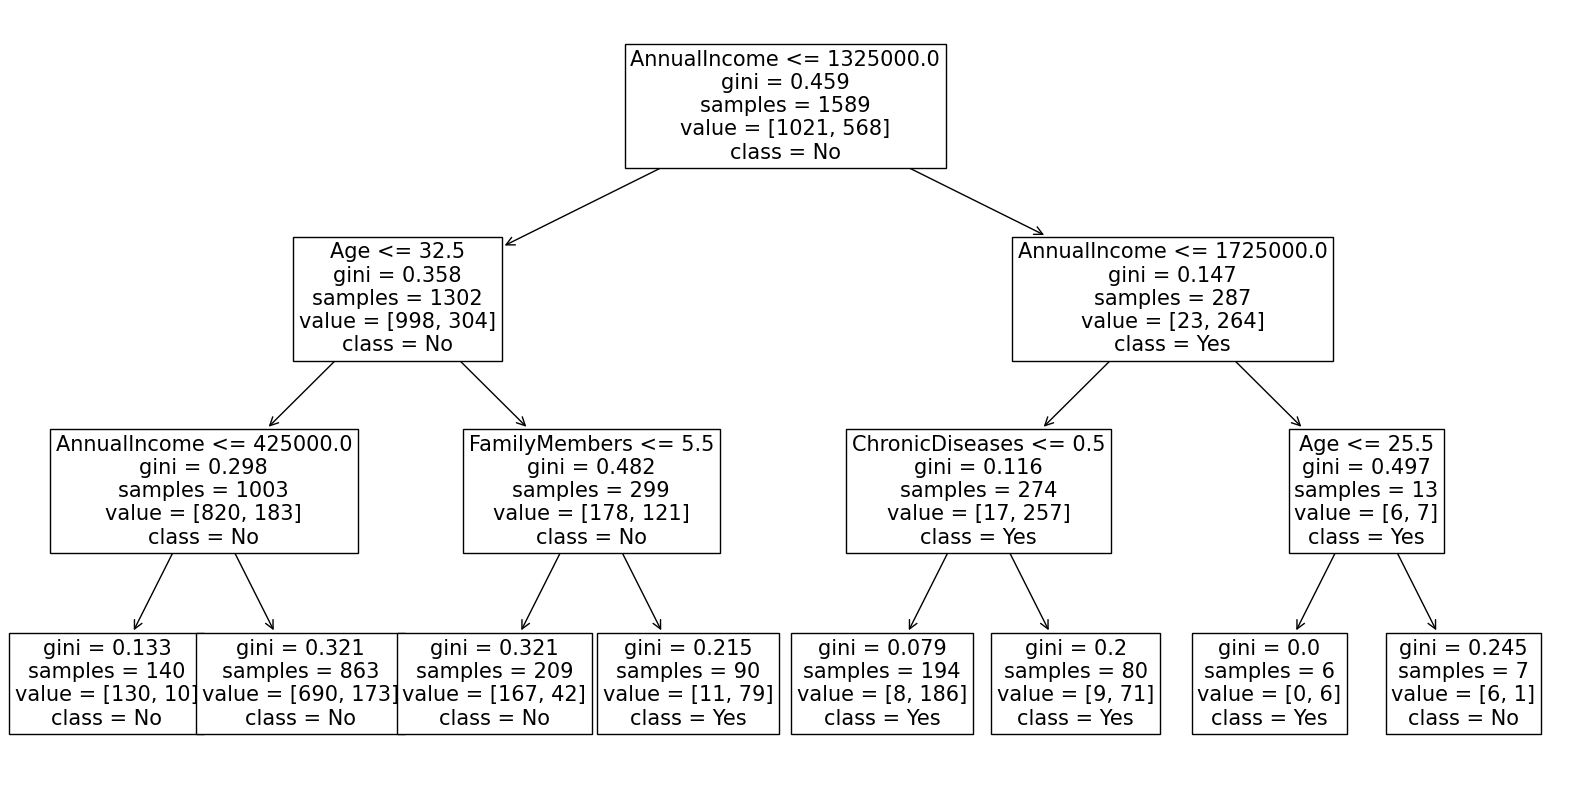

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

#stworzenie modelu i trening
class_dt = DecisionTreeClassifier(max_depth=3)
class_dt.fit(X_train, y_train)

#wizualizacja podejmowanych decyzji
plt.figure(figsize=(20,10))
tree.plot_tree(class_dt,feature_names=X.columns, class_names=["No","Yes"], fontsize=15)

**Predykcja modelu**

In [ ]:
#predykcja
y_pred=class_dt.predict(X_test)
probas=class_dt.predict_proba(X_test)

In [ ]:
y_pred

In [ ]:
probas

In [ ]:
#stworzenie dataframe zawierajacgo X_test, y_test, y_pred oraz probas
def create_results_df(X_test, y_test, y_pred, probas):
  results=X_test.copy()
  results["y_test_TI"]=y_test
  results["y_pred_TI"]=y_pred
  results["proba_TI"]=probas[:,1]
  return results

In [ ]:
#stworzenie dataframe zawierajacgo X_test, y_test, y_pred oraz probas dla klasy 1
results=create_results_df(X_test, y_test, y_pred, probas)
results.head(10)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes,y_test_TI,y_pred_TI,proba_TI
1451,25,1150000,4,1,1,0,0,0,0,0,0.200463
1962,25,1150000,7,0,1,0,0,0,0,0,0.200463
1287,34,500000,4,0,1,1,0,0,0,0,0.200957
536,30,500000,3,0,1,0,0,0,0,0,0.200463
1731,31,500000,5,0,1,1,0,0,0,0,0.200463
1213,25,750000,2,0,0,1,0,1,1,0,0.200463
751,28,1350000,9,0,1,1,0,1,1,1,0.958763
736,30,650000,7,0,1,0,0,0,0,0,0.200463
834,33,1400000,5,1,1,1,1,1,1,1,0.887500
1866,28,300000,7,1,0,1,0,0,0,0,0.071429


In [ ]:
from sklearn.metrics import confusion_matrix

#wyznaczenie macierzy pomylek
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion matrix")
print(cm)

Confusion matrix
[[250   6]
 [ 66  76]]


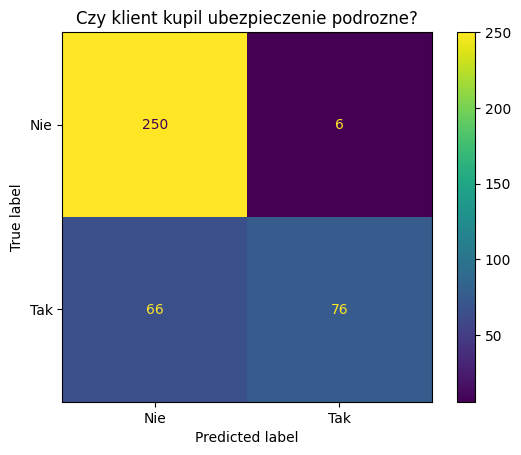

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

#wizualizacja graficzna macierzy pomylek
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Nie", "Tak"])
cm_display.plot()
plt.title("Czy klient kupil ubezpieczenie podrozne?")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

#wyznaczenie metryk
print("Metryki")
print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))

Metryki
              precision    recall  f1-score   support

         Nie       0.79      0.98      0.87       256
         Tak       0.93      0.54      0.68       142

    accuracy                           0.82       398
   macro avg       0.86      0.76      0.78       398
weighted avg       0.84      0.82      0.80       398



**Klasyfikator Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#stworzenie klasyfikatora i trening
class_rf = RandomForestClassifier()
class_rf.fit(X_train, y_train)

#predykcja
y_pred=class_rf.predict(X_test)
probas=class_rf.predict_proba(X_test)

#stworzenie dataframe zawierajacgo X_test, y_test, y_pred oraz probas
results=create_results_df(X_test, y_test, y_pred, probas)

#wyznaczenie macierzy pomylek
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

#wyznaczenie metryk
print("Metryki")
print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))



Confusion matrix
[[226  30]
 [ 55  87]]
Metryki
              precision    recall  f1-score   support

         Nie       0.80      0.88      0.84       256
         Tak       0.74      0.61      0.67       142

    accuracy                           0.79       398
   macro avg       0.77      0.75      0.76       398
weighted avg       0.78      0.79      0.78       398



**Klasyfikator SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler

#Przygotowanie danych treningowych do modelu dla klasyfikatora SVM
#przeskalowanie danych
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
def train_and_test(classifier, X_train, y_train, X_test, y_test, column_names=None):
  #stworzenie klasyfikatora i trening
  classifier.fit(X_train, y_train)

  #predykcja
  y_pred=classifier.predict(X_test)
  probas=classifier.predict_proba(X_test)

  #stworzenie dataframe zawierajacgo X_test, y_test, y_pred oraz probas
  if column_names is not None:
    X_test_df = pd.DataFrame(X_test, columns=column_names)
    results=create_results_df(X_test_df, y_test, y_pred, probas)
  else:
    results=create_results_df(X_test, y_test, y_pred, probas)

  #wyznaczenie macierzy pomylek
  print("Confusion matrix")
  print(confusion_matrix(y_test, y_pred, labels=[0,1]))

  #wyznaczenie metryk
  print("Metryki")
  print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))
  return results

In [ ]:
from sklearn.svm import SVC

classifier = SVC(probability=True)
results=train_and_test(classifier, X_train, y_train, X_test, y_test, X.columns)

#zmienna classifier zawiera już wytrenowany obiekt


Confusion matrix
[[243  13]
 [ 73  69]]
Metryki
              precision    recall  f1-score   support

         Nie       0.77      0.95      0.85       256
         Tak       0.84      0.49      0.62       142

    accuracy                           0.78       398
   macro avg       0.81      0.72      0.73       398
weighted avg       0.79      0.78      0.77       398



**Zapisanie modelu do pliku**

In [ ]:
import pickle
path_to_save="model_SVM.pickle"

with open(os.path.join(current_path,path_to_save), 'wb') as model_file:
  pickle.dump(classifier, model_file)

**Odczyt modelu zapisanego do pliku**

In [ ]:
model_path="model_SVM.pickle"
with open(os.path.join(current_path,model_path), 'rb') as model_file:
    model = pickle.load(model_file)
  #zmienna model zawiera obiekt klasyfikatora SVM

In [ ]:
#predykcja
y_pred=model.predict(X_test)

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


Confusion matrix
[[243  13]
 [ 73  69]]


**Wprowadzenie parametru dla nierównolicznych klas: parametr class_weight w Random Forest**

In [ ]:
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
#podzial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#trening
class_rf = RandomForestClassifier(class_weight="balanced")
class_rf.fit(X_train, y_train)

#przewidywanie
y_pred=class_rf.predict(X_test)

#wyznaczenie macierzy pomylek
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion matrix")
print(cm)

#wyznaczenie metryk
print("Metryki")
print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))

Confusion matrix
[[217  39]
 [ 50  92]]
Metryki
              precision    recall  f1-score   support

         Nie       0.81      0.85      0.83       256
         Tak       0.70      0.65      0.67       142

    accuracy                           0.78       398
   macro avg       0.76      0.75      0.75       398
weighted avg       0.77      0.78      0.77       398



**Interpretowalność wyników**

Dobrą interpretowalność wyników można uzyskać stosując modele z podejściem parametrycznym. Cechą takich modeli jest duże obciążenie i mała wariancja.
Najbardziej znane modele z interpretowalności to regresja liniowa i regresja logistyczna. Umożliwiają one bezpośrednią interpretowalność modelu.
Inne modele takie jak Random Forest, SVM rónwież możemy interpretować.

Regresję liniową oraz regresję logistyczną mieliście już na zajęcia więc dzisiaj zajmiemy się przykładem wyekstrachowania ważności cech z modelu Random Forest.
W modelu Decision Tree ważność cech możemy wyekstrahować na podstawie liczby węzłów, w którtcg dokonywany jest podział na podstawie tej cechy. Ważność cechy N możemy oszacować na podstawie liczby węzłów, w której odbywa się podział względem tej cechy.

Z nauczonych modeli możemy wyciągnąć miary ważności cech, które mówią nam o ważności cech w modelu. Im większy jest współczynnik przypisany do danej cechy tym cecha ma większy wpływ na predykcje modelu.


In [ ]:
import numpy as np
importances = class_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in class_rf.estimators_], axis=0)

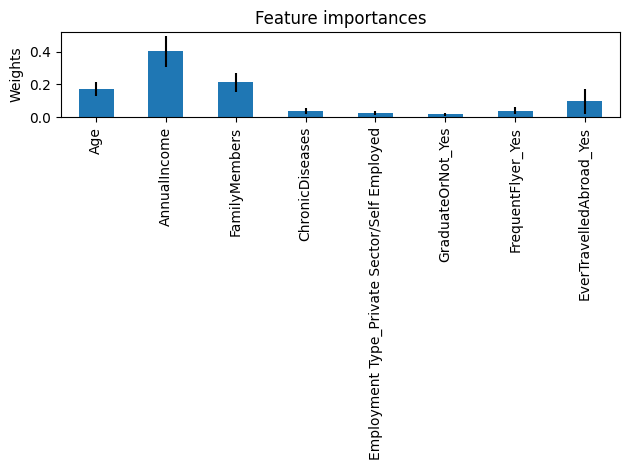

In [ ]:
import pandas as pd

feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Weights")
fig.tight_layout()

**Algorytm tSNE**

Jest to nienadzorowana technika stosowana przede wszystkim do eksploracji i wizualizacji danych wielowymiarowych. Algorytm t-SNE nie jest podejściem grupującym i służy wyłącznie do eksploracji. Algorytm wymaga aby dane były znormalizowane.  W celu znormalizowania danych można użyć klasy StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scal)

df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

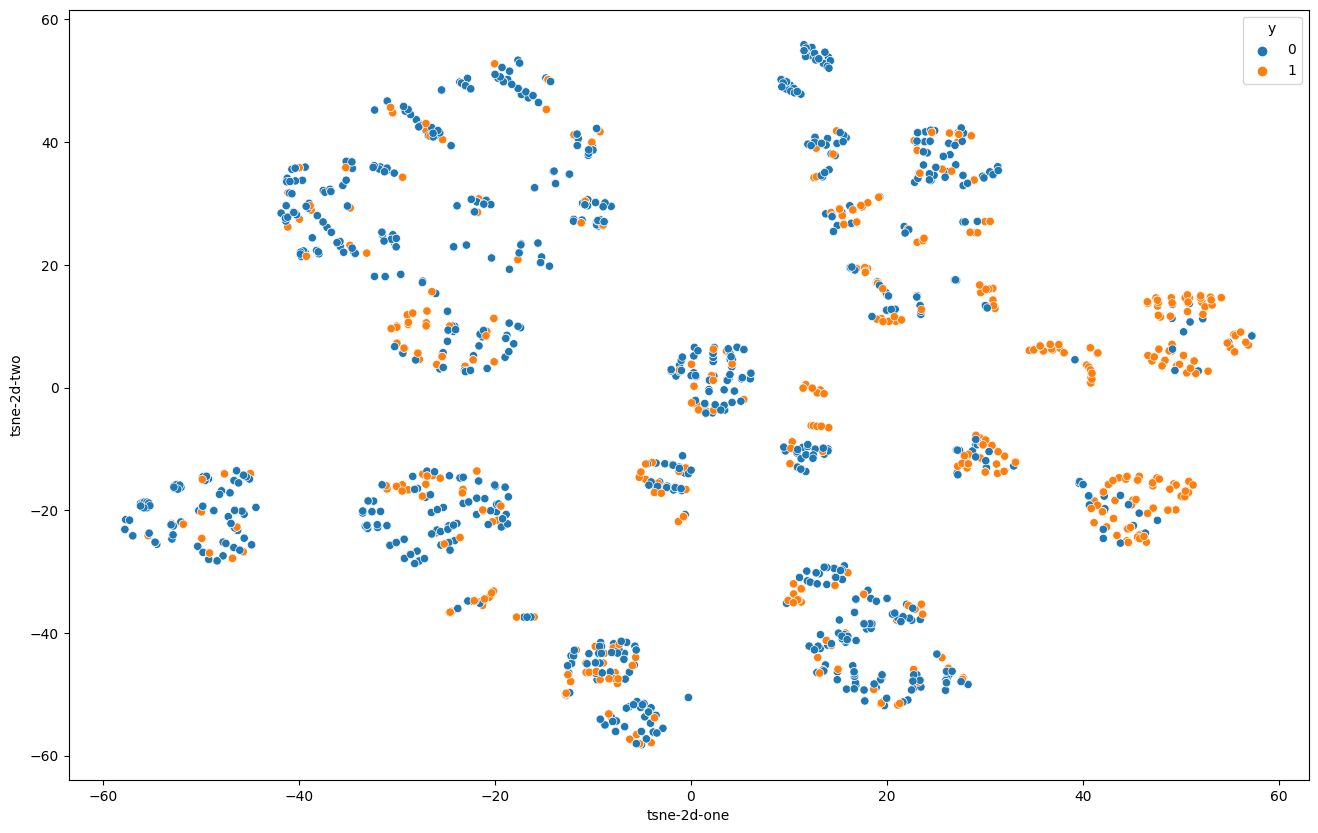

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full"
)

**Zadania do zrobienia**

Spróbuj powtórzyć kroki zaprezentowane w tym notatniku dla wybranego zbioru danych. Zbiór danych możesz znaleźć:

https://scikit-learn.org/stable/datasets.html

lub

https://www.kaggle.com/datasets

Jeśli klasy opisane są za pomocą tekstu/etykiet, to trzeba je zakodować za pomocą liczb od 0 do liczby klas -1.

Przykład:
Klasyfikacja 3 klasowa, etykiety: pozytywny, negatywny, neutralny. Muszą zostać zakodowane do postaci 0,1,2.
Można to zrobić za pomocą klasy LabelEncoder.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

